In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
!pip install -q keras

In [ ]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
!pip install Keras-Preprocessing
from keras_preprocessing.image import load_img, img_to_array


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions


train_datagen = ImageDataGenerator(zoom_range = 0.5, shear_range= 0.3, horizontal_flip = True, preprocessing_function = preprocess_input )
val_datagen = ImageDataGenerator(rescale=1/255, preprocessing_function = preprocess_input)
train = train_datagen.flow_from_directory(directory="/content/drive/MyDrive/train1", target_size = (256,256), batch_size = 32)
val = val_datagen.flow_from_directory(directory="/content/drive/MyDrive/valid1", target_size = (256,256), batch_size = 32)


Found 6011 images belonging to 4 classes.
Found 1829 images belonging to 4 classes.


In [ ]:
t_img, label = train.next()

In [ ]:
def plotImage(img_arr, label):
  for im, l in zip(img_arr, label):
    plt.figure(figsize=(5,5))
    plt.show()

**BUILDINNG OUR MODEL**

In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [ ]:
base_model = VGG19(input_shape=(256,256,3), include_top = False)

In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
X = Flatten()(base_model.output)

X = Dense(units  = 4, activation = 'softmax')(X)

# creating our model

model = Model(base_model.input, X)

In [ ]:
from tensorflow.keras.optimizers.legacy import Adam
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

**Early Stopping and Model CheckPoint**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
es = EarlyStopping(monitor='val_accuracy', min_delta = 0.01, patience=8, verbose = 1)
mc = ModelCheckpoint(filepath='best_model.h5',
                     monitor = 'val_accuracy',
                     min_delta = 0.01,
                     patience = 4,
                     verbose = 1,
                     save_best_only = True)

cb=[es,mc]


In [ ]:
print("All hail hritik, that shalt be king hereafter!!")
print(train)

All hail hritik, that shalt be king hereafter!


In [ ]:
his = model.fit_generator(train,
                steps_per_epoch=16,
                epochs=50, verbose=1,
                callbacks=cb,
                validation_data= val,
                validation_steps=4)

<ipython-input-54-9b7b59cad0e0>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train,


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 2.5462 - accuracy: 0.9219
Epoch 1: val_accuracy did not improve from 0.80469
16/16 [==============================] - 17s 1s/step - loss: 2.5462 - accuracy: 0.9219 - val_loss: 1.0900 - val_accuracy: 0.5859
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 0.8823 - accuracy: 0.9590
Epoch 2: val_accuracy did not improve from 0.80469
16/16 [==============================] - 14s 910ms/step - loss: 0.8823 - accuracy: 0.9590 - val_loss: 0.8781 - val_accuracy: 0.6484
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 0.8144 - accuracy: 0.9707
Epoch 3: val_accuracy did not improve from 0.80469
16/16 [==============================] - 14s 856ms/step - loss: 0.8144 - accuracy: 0.9707 - val_loss: 1.5202 - val_accuracy: 0.5391
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 0.6725 - accuracy: 0.9609
Epoch 4: val_accuracy did not improve from 0.80469
16/16 [====================

In [ ]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c ="red")
plt.title("acc vs v_acc")
plt.show()

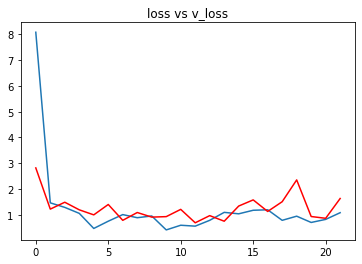

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c ="red")
plt.title("loss vs v_loss")
plt.show()

In [ ]:
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [ ]:
acc = model.evaluate_generator(val)[1]
print(f"The accuracy of our model is : {acc*100}%")

<ipython-input-58-7d771f875d8a>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(val)[1]


The accuracy of our model is : 75.50573945045471%


Check with a img

In [ ]:
ref = dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))

In [ ]:
def prediction(path):
  img = load_img(path, target_size = (256,256))
  i = img_to_array(img)
  im = preprocess_input(i)
  print(im)
  print(im.shape)
  img = np.expand_dims(im, axis = 0)
  pred = np.argmax(model.predict(img))
  print(f"The image belongs to {ref[pred]}")

In [ ]:
path = "/content/drive/MyDrive/asasa.jpg"
prediction(path)

1/1 [==============================] - 0s 22ms/step
The image belongs to Corn_(maize)___Common_rust_


**DEPLOYING IT!**

In [ ]:
!pip install -q streamlit

In [ ]:
%%writefile app.py
#def add_bg_from_url():
 #   st.markdown(
  #       f"""
   #      <style>
    #     .stApp {{
     #        background-image: url("https://cdn.pixabay.com/photo/2019/04/24/11/27/flowers-4151900_960_720.jpg");
      #       background-attachment: fixed;
       #      background-size: cover
        # }}
         #</style>
         #""",
         #unsafe_allow_html=True
     #)

#add_bg_from_url()

import keras_preprocessing
from PIL import Image
from keras_preprocessing.image import load_img, img_to_array
import streamlit as st
import tensorflow as tf
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions

@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/content/best_model.h5')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # Plant Leaf Detection by h.
         """
         )

file = st.file_uploader("Upload the image to be classified \U0001F447", type=["jpg", "png"])
import cv2
from PIL import Image, ImageOps
import numpy as np
st.set_option('deprecation.showfileUploaderEncoding', False)
def upload_predict(upload_image, model):
          size = (256,256)
          image = ImageOps.fit(upload_image, size, Image.ANTIALIAS)
          i = img_to_array(image)
          im = preprocess_input(i)
          print(im)
          print(im.shape)
          img = np.expand_dims(im, axis = 0)
          pred = np.argmax(model.predict(img))
          return pred

thisdict = {
  0: "Corn_(maize)_Cercospora_leaf_spot Gray_leaf_spot",
  1: "Corn_(maize)_Common_rust",
  2: "Corn_(maize)_Northern_Leaf_Blight",
  3: "Corn_(maize)_healthy"
}
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    idx = upload_predict(image, model)
    st.write("The index of the class it belongs is", thisdict[idx])

    # image_class = str(predictions[0][0][1])
    # score=np.round(predictions[0][0][2],5)
    # st.write("The image is classified as",image_class)
    # st.write("The similarity score is approximately",score)


Overwriting app.py


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501

[#######...........] / extract:localtunnel: verb lock using /root/.npm/_locks/s


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.73.210.137:8501

npx: installed 22 in 3.718s
your url is: https://gentle-beans-add-34-73-210-137.loca.lt
2023-03-28 09:05:38.901 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 565, in _run_script
    exec(code, module.__dict__)
  File "/content/app.py", line 15, in <module>
    add_bg_from_url()
  File "/content/app.py", line 2, in add_bg_from_url
    st.markdown(
NameError: name 'st' is not defined
